# CSE 252A Computer Vision I Fall 2021 - Assignment 2

## Instructor: Ben Ochoa

- Assignment Published On: **Wed, Oct. 20, 2021**.

- Due On: **Wed, Nov. 3, 2021 11:59 PM (Pacific Time)**.

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/29614).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1 Image filtering [15 pts]

### Problem 1.1 Implementing Convolution[5 pts]


In this problem, you will implement the convolution filtering operation in NumPy.

As shown in the lecture, a convolution can be considered as a sliding window that computes a sum of the pixel values weighted by the flipped kernel. Your version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute a weighted sum of the neighborhood at each pixel.

#### Problem 1.1.1  [1 pts]
First you will want to implement the **zero_pad** function.

In [7]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt
from math import ceil

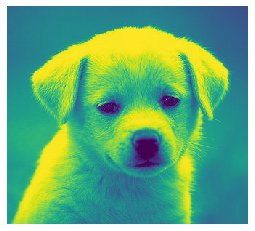

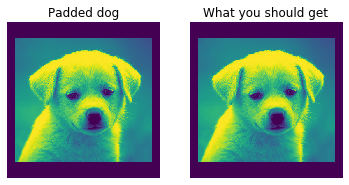

In [8]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Get image size.
    Height, Width = image.shape
    
    # Initiaze the zero_pad (out)
    # Zero Pad Size (Top + H + Bottom, Left + W + Right)
    out = np.zeros((pad_top + Height + pad_down, pad_left + Width + pad_right))
    
    # Create the zero pad with vectorized method.
    out[pad_top : pad_top + Height, pad_left : pad_left + Width] = image;

    return out


# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.2 [2 pts]
Now implement the function **`conv`**, **using at most 2 loops**. This function should take an image $f$ and a kernel $h$ as inputs and output the convolved image $(f*h)$ that has the same shape as the input image (use zero padding to accomplish this). Depending on the computer, your implementation should take around a second or less to run.


took 0.609013 seconds.


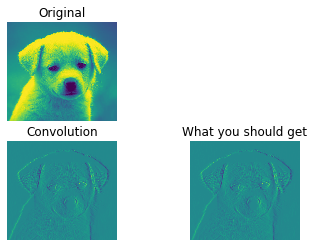

In [9]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Calculate total padding on Rows
    #Pad_rows = Wk - 1
    #Pad_columns = Hk - 1
    
    # Calculate the required pad size for each side
    #pad_left = ceil(Pad_rows / 2)
    #pad_right = ceil(Pad_rows - Pad_rows / 2)
    #pad_top = ceil(Pad_columns / 2)
    #pad_bottom = ceil(Pad_columns - Pad_columns / 2)
    
    # For even-size kernel, you can pad the left and top side with kernel_size / 2 and 
    # the right and down side with kernel_size - left/top_padding_size - 1.
    
    if (Wk % 2) == 0:
        
        pad_left = Wk//2
        pad_right = Wk - pad_left - 1
        
    else:
        
        pad_left = (Wk - 1) // 2
        pad_right = pad_left
        
    if (Hk % 2) == 0:
        
        pad_top = Hk//2
        pad_bottom = Hk - pad_top - 1
        
    else:
        
        pad_top = (Hk - 1)//2
        pad_bottom = pad_top
        
    
    ## Pad the image.
    padded_img = zero_pad(image, pad_top, pad_bottom, pad_left, pad_right)
    
    ## Flip the kernel both horizontally and vertically
    flipped_kernel = np.flip(np.flip(kernel,1),0)
    
    ## Convolution Formula
    ##          m/2        m/2
    ## R(i,j) = sum        sum    K(h,k) * I(i-h, j-k)
    ##        h = -m/2  k = - m/2
    ## Kernel size, (m+1 x m+1)
    
    # Calculate the Convolution, R for each pixel.
    for i in range(0, Hi):
        for j in range(0, Wi):
            out[i, j] = np.sum(flipped_kernel * padded_img[i : i + Hk, j : j + Wk])
    return out

# Simple convolution kernel.
# Feel free to change the kernel and to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.3 [1 pt]
Now let's filter some images! Here, you will apply the convolution function that you just implemented in order to bring about some interesting image effects. More specifically, we will use convolution to blur and sharpen our images.

First we will apply convolution for image blurring. To accomplish this, convolve the dog image with a 7x7 Gaussian filter for $\sigma = 1.0$. You can use the included function to obtain the Gaussian kernel.

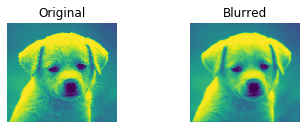

In [10]:
def gaussian2d(filter_size=7, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    blurred_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    # Get the Gaussian kernel
    gauss_kernel = gaussian2d(filter_size=7, sig=1.0)
    
    # Blur the image
    blurred_img = conv(img, gauss_kernel)
    
    return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img))
plt.title('Blurred')
plt.axis('off')

plt.show()

#### Problem 1.1.4 [1 pt]
Next, we will use convolution to sharpen the images. Convolve the image with the following filter to produce a sharpened result. For convenience, we have defined the filter for you:


In [11]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

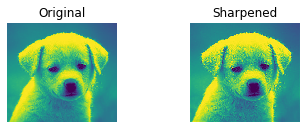

In [12]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    sharpened_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Sharpen the image
    sharpened_img = conv(img, sharpening_kernel)
    
    return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0)
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0)
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Problem 1.2: Convolution Theory  [5 pts]
#### Problem 1.2.1 [2 pts]
Consider (1) smoothing an image with a 3x3 box filter and then computing the derivative in the x-direction. Also consider (2) computing the derivative first, then smoothing. What is a single convolution kernel that will simultaneously implement both (1) and (2)? Try to give a brief justification for how you arrived at the kernel.

Use the x-derivative filter  $$[-1/2,0,1/2]$$ for this problem.

###### **Solution:**<br>
Consider the 3 x 3 box filter as following:

$k_{1} = \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9}\end{bmatrix}$

Besides that, consider the x-derivative filter as the following:

$k_{2} = \begin{bmatrix} -\frac{1}{2} & 0 & \frac{1}{2} \end{bmatrix}$

Based on the CSE 252A "Lecture 5 Image Filtering" slide 34 by Professor Ochoa, there are multiple convolution properties including the associative and commutative properties. Convolution associative law states that:

$(((I * k_{1}) * k_{2})) = I * (k_{1} * k_{2})$

where, $I$ is denoted as the padded image.

Convolution associative law also states that:

$k_{1} * k_{2} = k_{2} * k_{1}$

Therefore, a single convolution, denoted as $K$, can be constructed by combining the two convolution filters as shown in the following:

$K = k_{2} * k_{1} = \begin{bmatrix} -\frac{1}{2} & 0 & \frac{1}{2} \end{bmatrix} * \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9}\end{bmatrix}$

$k_{1}$ was zero-padded left and right with a width of 1 on each side only before the convolution.

$K = \begin{bmatrix} -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18} \\ -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18} \\ -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18}\end{bmatrix}$

Hence, the single convolution kernel that will simultaneously implement both $k_{1}$ and $k_{2}$ is $K = \begin{bmatrix} -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18} \\ -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18} \\ -\frac{1}{18} & -\frac{1}{18} & 0 & \frac{1}{18} & \frac{1}{18}\end{bmatrix}$.

#### Problem 1.2.2 [3 pts]
Certain 2D filters can be expressed as a convolution of two 1D filters. Such filters are called separable filters. Give an example of a 3x3 separable filter and compare the number of arithmetic operations it takes to
convolve an n x n image using that filter before and after separation. Count both, the number of multiplication and addition operations in each case.

Assume that the convolution of the image and filter is performed in "valid" mode, i.e., the image is not padded before convolution.

###### **Solution:**<br>

From the **Problem 1.2.1** above, the 3 $\times$ 3 box filter can also be a separable filter, which is $k_{1} = \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9}\end{bmatrix}$. The box filter, $k_{1}$ can be split into two 1D array kernels, which are a 1 $\times$ 3 vector filter, $k_{r} = \begin{bmatrix} \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \end{bmatrix}$, and a 3 $\times$ 1 vector filter, $k_{c} = \begin{bmatrix} \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{3} \end{bmatrix}$.

The convolution of the image and filter is assumed to be performed in "valid" mode, i.e., the image, denoted as $I_{0}$, is not padded before convolution given that the image size is a n $\times$ n. $n$ must be greater or equal to 3.

If the filters separation approach is used, 3 multiplications and 2 additions will be perform for $k_{r}$; then, it will have 5 arithmetic operations for $n(n - 2)$ pixels, which is $5n(n - 2)$ because 2 pixels will be dropped for each row while perfoming the convolution of the $I_{0}$ and $k_{r}$ in "valid" mode. As a result, the size of the new image, denoted as $I_{1}$, is $n \times (n-2)$. Next, there will be another 3 multiplications and 2 additions will be perform for convoluting $k_{c}$ and $I_{1}$; as a result, it will have another 5 arithmetic operations for $(n - 2)(n - 2)$ pixels, which is $5(n - 2)^{2}$ because 2 pixels will be dropped for each column while perfoming the convolution of the $I_{1}$ and $k_{c}$ in "valid" mode. Finally, the size of the final image, denoted as $I_{12}$, is $(n - 2) \times (n - 2)$. Therefore, the total number of arithmetic operations for the separation method is $10(n - 2)(n - 1)$ as shown below:

$(3 + 2)n(n - 2) + (3 + 2)(n - 2)^{2} = (3 + 2)(n - 2)(n + n - 2)$<br>

$(3 + 2)(n - 2)(n + n - 2) = (3 + 2)(n - 2)2(n - 1)$<br>

$(6 + 4)(n - 2)(n - 1) = 10(n - 2)(n - 1)$

The total number of multiplication and addition operations for the separation method are $6(n - 2)(n - 1)$ and $4(n - 2)(n - 1)$, respectively.

If the filters without separation approach is used, 9 multiplications and 8 additions will be perform for $k_{1}$; then, it will have 17 arithmetic operations for $(n - 2)^{2}$ pixels, which is $17(n - 2)^{2}$ because 2 pixels will be dropped for each row and another 2 pixels will be dropped for each column while perfoming the convolution of the $I_{0}$ and $k_{1}$ in "valid" mode. As a result, the size of the final image, denoted as $I_{3}$, is $(n - 2) \times (n - 2)$. Therefore, the total number of arithmetic operations for the non-separation method is $17(n - 2)^{2}$ as shown below:

$(9 + 8)(n - 2)^{2} = 17(n - 2)^{2}$<br>

The total number of multiplication and addition operations for the separation method are $9(n - 2)^{2}$ and $8(n - 2)^{2}$, respectively.

In conclusion, the filters separation method reduces the cost of the computing because the total number of arithmetic operations for the separation method is $7n^{2} - 4n + 48$, $n \geq 3$, lesser than the total number of arithmetic operations for the non-separation method.



### Problem 1.3 Template Matching [5 pts]
Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CSE 252A (or are learning right now) that convolution can be used for template matching: a template g is multiplied with regions of a larger image f to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that our solution is not biased toward higher-intensity (white) regions.

The template of a product (template.jpg) and the image of the shelf (shelf.jpg) is provided. We will use convolution to find the product in the shelf.

<img src="template.jpg" alt="template" width="25px"/>
<img src="shelf.jpg" alt="shelf" width="600px"/>


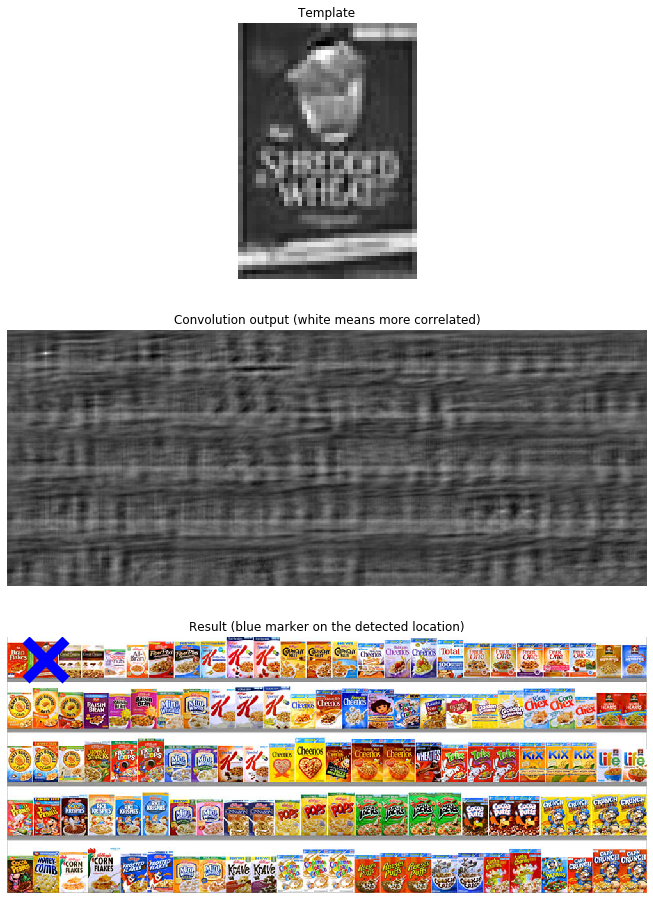

In [14]:
from scipy.signal import convolve

# Load template and image in grayscale
img = io.imread('shelf.jpg')
img_gray = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_gray = io.imread('template.jpg', as_gray=True)

# Perform a convolution between the image and the template and store 
# the result in the out variable
""" ==========
YOUR CODE HERE
========== """

# Initialize output image
out = np.zeros_like(img_gray)

# Determine the mean of the gray image
img_gray_avg = np.mean(img_gray)

# Determine the mean of the template image
temp_gray_avg = np.mean(temp_gray)

# Find the difference between each pixel and the mean value of the pixel.
conv_img_gray = img_gray - img_gray_avg

# Create the filter ()
# kernel = temp_gray - temp_gray_avg
flipped_kernel = np.flip(np.flip(temp_gray,1),0) - temp_gray_avg

# Convolute the image with the filter
out = conv(conv_img_gray, flipped_kernel)

# Determine which position has the most similarity
y, x = np.unravel_index(np.argmax(out, axis=None), out.shape)

# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

## Problem 2: Edge detection [21 pts]

In this problem, you will write a function to perform Canny edge detection. The following steps need to be implemented.

### Problem 2.1 Smoothing [1 pt]
First, we need to smooth the images in order to prevent noise from being considered as edges. For this assignment, use a 9x9 Gaussian kernel filter with $\sigma = 1.4$ to smooth the images.

In [15]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [16]:
def gaussian2d(filter_size=None, sig=None):
    """Creates a 2D Gaussian kernel with
    side length `filter_size` and a sigma of `sig`."""
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [17]:
def smooth(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    # Assign Filter Size (9 x 9)
    filter_size = 9
    
    # Assign sig value
    sig = 1.4
    
    gauss_kernel = gaussian2d(filter_size, sig)
    
    return conv(image, gauss_kernel)
    

Original:


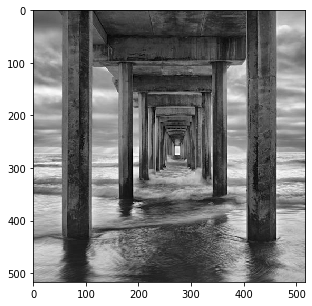

Smoothed:


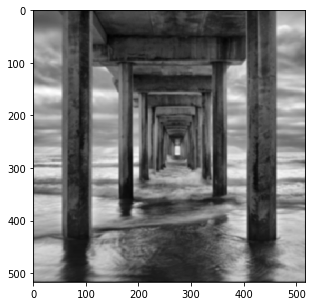

In [18]:
# Load image in grayscale
image = io.imread('sio_pier.jpg', as_gray=True)
assert len(image.shape) == 2, 'image should be grayscale; check your Python/skimage versions'
smoothed = smooth(image)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Problem 2.2 Gradient Computation [5 pts]
After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$. The edge direction for each pixel is given by $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

In [19]:
def gradient(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Initialize Gradient Magnitude
    g_mag = np.zeros((image.shape[0], image.shape[1]))
    
    # Initialize Gradient Angle
    g_theta = np.zeros((image.shape[0], image.shape[1]))
    
    # Define Sobel Kernel in the x direction
    #sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    dx_kernel = np.array([[-1/2, 0, 1/2]])
    #prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    
    # Define Sobel Kernel in the y direction
    #sobel_y_kernel = np.transpose(sobel_x_kernel)
    dy_kernel = np.transpose(dx_kernel)
    #prewitt_y_kernel = np.transpose(prewitt_x_kernel)
    
    # Determine Gx and Gy
    #G_x = conv(image, sobel_x_kernel)
    #G_y = conv(image, sobel_y_kernel)
    G_x = conv(image, dx_kernel)
    G_y = conv(image, dy_kernel)
    #G_x = conv(image, prewitt_x_kernel)
    #G_y = conv(image, prewitt_y_kernel)
    
    # Determine g_mag
    g_mag = np.sqrt(G_x**2 + G_y**2)
    
    # Determine g_theta
    g_theta = np.arctan(G_y / G_x)
    
    return g_mag, g_theta

Gradient magnitude:


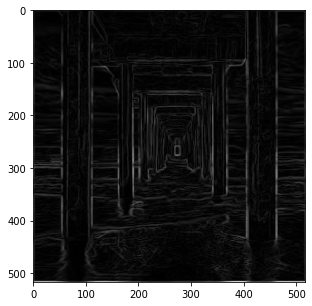

In [20]:
g_mag, g_theta = gradient(smoothed)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()

### Problem 2.3 Non-Maximum Suppression [7 pts]
We would like our edges to be sharp, unlike the ones in the gradient image. Use non-maximum suppression to preserve all local maxima and discard the rest. You can use the following method to do so:

  - For each pixel in the gradient magnitude image:
    - Round the gradient direction $\theta$ to the nearest multiple of $45^{\circ}$ (which we will refer to as $ve$).
    - Compare the edge strength at the current pixel to the pixels along the $+ve$ and $-ve$ gradient direction in the 8-connected neighborhood.
    - If the pixel does not have a larger value than both of its two neighbors in the $+ve$ and $-ve$ gradient directions, suppress the pixel's value (set it to 0). By following this process, we preserve the values of only those pixels which have maximum gradient magnitudes in the neighborhood along the $+ve$ and $-ve$ gradient directions.
  - Return the result as the NMS response.

In [21]:
def nms(g_mag, g_theta):
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the size of the image
    Height, Width = g_mag.shape
    
    # Initialize the nms_response
    nms_response = np.zeros((Height, Width))

    # Convert to degrees
    g_theta_deg = g_theta * 180.0 / np.pi
    g_theta_deg[g_theta_deg < 0] += 180.0
    
    # Round to nearest 45 degrees.
    g_theta_deg = np.round(g_theta_deg / 45) * 45
    
    for h in range(1, Height - 1):
        for w in range(1, Width - 1):
            
            # If the g_theta_deg is 0 or 180 degrees
            if ( g_theta_deg[h, w] == 0) or (g_theta_deg[h, w] == 180):
                
                neigh_1 = g_mag[h, w + 1]
                neigh_2 = g_mag[h, w -1]
                
            # If the g_theta_deg is 45 degrees
            elif (g_theta_deg[h, w] == 45):
                
                neigh_1 = g_mag[h + 1, w - 1]
                neigh_2 = g_mag[h - 1, w + 1]
                
            # If the g_theta_deg is 90 degrees   
            elif (g_theta_deg[h, w] == 90):
                
                neigh_1 = g_mag[h + 1, w]
                neigh_2 = g_mag[h - 1, w]
                
            # If the g_theta_deg is 135 degrees   
            elif (g_theta_deg[h, w] == 135):
                
                neigh_1 = g_mag[h - 1, w - 1]
                neigh_2 = g_mag[h + 1, w + 1]
                
            # If the current value is bigger than the neighbour values
            if (g_mag[h, w] >=  neigh_1) and (g_mag[h, w] >=  neigh_2):
                
                nms_response[h, w] = g_mag[h, w]
            
            # Else, set to zero
            else:
                
                nms_response[h, w] = 0

    return nms_response

0.22250424277469194
NMS:


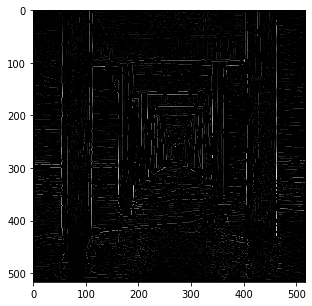

In [22]:
nms_image = nms(g_mag, g_theta)
print(nms_image.max())
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

### Problem 2.4 Hysteresis Thresholding [8 pts]
Choose suitable values of thresholds and use the thresholding approach decribed in lecture 6. This will remove the edges caused by noise and color variations.

  - Define two thresholds `t_min` and `t_max`. 
  - If the `nms > t_max`, then we select that pixel as an edge.
  - If `nms < t_min`, we reject that pixel.
  - If `t_min < nms < t_max`, we select the pixel only if there is a path from to another pixel with `nms > t_max`. (Hint: Think of all pixels with `nms > t_max` as starting points and run BFS/DFS from these starting points).
  - The choice of value of low and high thresholds depends on the range of values in the gradient magnitude image. You can start by setting the high threshold to some percentage of the max value in the gradient magnitude image, e.g. thres_high = 0.2 * image.max(), and the low threshold to some percentage of the high threshold, e.g. thres_low = 0.85 * thres_high. And then you can tune those values however you want.

In [23]:
def hysteresis_threshold(image, g_theta, use_g_theta=False):
    """ ==========
    YOUR CODE HERE
    ========== """
    #Set high threshold
    thres_high = 0.15 * image.max()
    # Set low threshold
    thres_low = 0.875 * thres_high
    
    # Define the height and width of the image
    Height, Width = image.shape
    
    # Initialize final result
    result = np.zeros((Height,Width))
    
    # If the intensity of the edge is more than the thres_high, store the index
    h_powerful, w_powerful = np.where(image >= thres_high)
    
    # Find the postions of the edges that are in between thresholds
    h_weak, w_weak = np.where((image < thres_high) & (image >= thres_low))
    
    # If the intensity of the edge is less than the thres_low, store the index
    h_zero, w_zero = np.where(image < thres_low)
    
    # Set the intensity value to the result image.
    result[h_powerful, w_powerful] = 1 # Set to maximum intensity.
    result[h_weak, h_weak] = 0.5       # Set to medium intensity.
    result[h_zero, w_zero] = 0         # Set to minimum intensity.
    
    # Convert to degrees
    g_theta_deg = g_theta * 180.0 / np.pi
    g_normal_deg = g_theta_deg + 90.0
    g_normal_deg[g_normal_deg > 180.0] -= 360.0 
    g_normal_deg2 = g_theta_deg - 90.0
    g_normal_deg2[g_normal_deg < -180.0] += 360.0 
    
    for h in range(1, Height - 1):
        for w in range(1, Width - 1):
            if (result[h, w] == 0.5):
                
                # Find whether 8 connected neighbours have a maximum intensity.
                #if 1 in [result[h+1, w-1], result[h + 1, w], result[h + 1, w + 1],result[h, w - 1],result[h, w + 1], result[h - 1, w - 1], result[h - 1, w], result[h - 1, w + 1]]:
                    
                    # If yes, set to 1
                    #result[h, w] = 1
                    
                # Else, set to 0
                #else:
                    
                    #result[h, w] = 0
                    
                # Find whether neighbours have a max intensity

                # If g_normal_deg is 0
                if ( g_normal_deg[h, w] == 0):
                    
                    r = g_mag[h, w + 1]
                    s = 0
                   
                # If g_normal_deg in between 0 and 45
                elif ( 0 < g_normal_deg[h, w] < 45):
                    
                    r = g_mag[h + 1, w + 1]
                    s = g_mag[h, w + 1]                  
                
                # If g_normal_deg is 45
                elif ( g_normal_deg[h, w] == 45):
                    
                    r = g_mag[h + 1, w + 1]
                    s = 0 

                # If g_normal_deg in between 45 and 90
                elif ( 45 < g_normal_deg[h, w] < 90):
                    
                    r = g_mag[h + 1, w]
                    s = g_mag[h + 1, w + 1]
                    
                # If g_normal_deg is 90
                elif ( g_normal_deg[h, w] == 90):
                    
                    r = g_mag[h + 1, w]
                    s = 0 
                    
                # If g_normal_deg in between 90 and 135
                elif ( 90 < g_normal_deg[h, w] < 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = g_mag[h + 1, w]
                    
                # If g_normal_deg is 135
                elif ( g_normal_deg[h, w] == 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = 0 
                    
                # If g_normal_deg in between 90 and 135
                elif ( 90 < g_normal_deg[h, w] < 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = g_mag[h + 1, w]
                    
                # If g_normal_deg is 135
                elif ( g_normal_deg[h, w] == 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = 0
                    
                # If g_normal_deg in between 135 and 180
                elif ( 135 < g_normal_deg[h, w] < 180):
                    
                    r = g_mag[h, w - 1]
                    s = g_mag[h + 1, w - 1]
                    
                # If g_normal_deg is 180
                elif ( g_normal_deg[h, w] == 180) or ( g_normal_deg[h, w] == -180):
                    
                    r = g_mag[h, w - 1]
                    s = 0 
                    
                # If g_normal_deg in between -180 and -135
                elif ( -180 < g_normal_deg[h, w] < -135):
                    
                    r = g_mag[h -1, w - 1]
                    s = g_mag[h, w - 1]
                    
                # If g_normal_deg is -135
                elif ( g_normal_deg[h, w] == -135):
                    
                    r = g_mag[h - 1, w - 1]
                    s = 0 
                    
                # If g_normal_deg in between -135 and -90
                elif ( -135 < g_normal_deg[h, w] < -90):
                    
                    r = g_mag[h -1, w]
                    s = g_mag[h -1, w - 1]
                    
                # If g_normal_deg is -90
                elif ( g_normal_deg[h, w] == -90):
                    
                    r = g_mag[h - 1, w]
                    s = 0
                    
                # If g_normal_deg in between -90 and -45
                elif ( -90 < g_normal_deg[h, w] < -45):
                    
                    r = g_mag[h - 1, w + 1]
                    s = g_mag[h - 1, w]
                    
                # If g_normal_deg is -45
                elif ( g_normal_deg[h, w] == -45):
                    
                    r = g_mag[h - 1, w + 1]
                    s = 0 
                    
                # If g_normal_deg in between -45 and 0
                elif ( -45 < g_normal_deg[h, w] < 0):
                    
                    r = g_mag[h, w + 1]
                    s = g_mag[h - 1, w + 1]
                    
                # If one of the neighbour values is 1.
                if (r == 1) or (s == 1):
                    
                    result[h, w] = 1
                    
                # Else, set to zero
                else:
                    
                    result[h, w] = 0
                    
                # If g_normal_deg2 is 0
                if ( g_normal_deg2[h, w] == 0):
                    
                    r = g_mag[h, w + 1]
                    s = 0
                   
                # If g_normal_deg2 in between 0 and 45
                elif ( 0 < g_normal_deg2[h, w] < 45):
                    
                    r = g_mag[h + 1, w + 1]
                    s = g_mag[h, w + 1]                  
                
                # If g_normal_deg2 is 45
                elif ( g_normal_deg2[h, w] == 45):
                    
                    r = g_mag[h + 1, w + 1]
                    s = 0 

                # If g_normal_deg2 in between 45 and 90
                elif ( 45 < g_normal_deg2[h, w] < 90):
                    
                    r = g_mag[h + 1, w]
                    s = g_mag[h + 1, w + 1]
                    
                # If g_normal_deg2 is 90
                elif ( g_normal_deg2[h, w] == 90):
                    
                    r = g_mag[h + 1, w]
                    s = 0 
                    
                # If g_normal_deg2 in between 90 and 135
                elif ( 90 < g_normal_deg2[h, w] < 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = g_mag[h + 1, w]
                    
                # If g_normal_deg2 is 135
                elif ( g_normal_deg2[h, w] == 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = 0 
                    
                # If g_normal_deg2 in between 90 and 135
                elif ( 90 < g_normal_deg2[h, w] < 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = g_mag[h + 1, w]
                    
                # If g_normal_deg2 is 135
                elif ( g_normal_deg2[h, w] == 135):
                    
                    r = g_mag[h + 1, w - 1]
                    s = 0
                    
                # If g_normal_deg2 in between 135 and 180
                elif ( 135 < g_normal_deg2[h, w] < 180):
                    
                    r = g_mag[h, w - 1]
                    s = g_mag[h + 1, w - 1]
                    
                # If g_normal_deg2 is 180
                elif ( g_normal_deg2[h, w] == 180) or ( g_normal_deg2[h, w] == -180):
                    
                    r = g_mag[h, w - 1]
                    s = 0 
                    
                # If g_normal_deg2 in between -180 and -135
                elif ( -180 < g_normal_deg2[h, w] < -135):
                    
                    r = g_mag[h -1, w - 1]
                    s = g_mag[h, w - 1]
                    
                # If g_normal_deg2 is -135
                elif ( g_normal_deg2[h, w] == -135):
                    
                    r = g_mag[h - 1, w - 1]
                    s = 0 
                    
                # If g_normal_deg2 in between -135 and -90
                elif ( -135 < g_normal_deg2[h, w] < -90):
                    
                    r = g_mag[h -1, w]
                    s = g_mag[h -1, w - 1]
                    
                # If g_normal_deg2 is -90
                elif ( g_normal_deg2[h, w] == -90):
                    
                    r = g_mag[h - 1, w]
                    s = 0
                    
                # If g_normal_deg2 in between -90 and -45
                elif ( -90 < g_normal_deg2[h, w] < -45):
                    
                    r = g_mag[h - 1, w + 1]
                    s = g_mag[h - 1, w]
                    
                # If g_normal_deg2 is -45
                elif ( g_normal_deg2[h, w] == -45):
                    
                    r = g_mag[h - 1, w + 1]
                    s = 0 
                    
                # If g_normal_deg2 in between -45 and 0
                elif ( -45 < g_normal_deg2[h, w] < 0):
                    
                    r = g_mag[h, w + 1]
                    s = g_mag[h - 1, w + 1]
                    
                # If one of the neighbour values is 1.
                if (r == 1) or (s == 1):
                    
                    result[h, w] = 1
                    
                # Else, set to zero
                else:
                    
                    result[h, w] = 0
                
                

    return result

Thresholded:


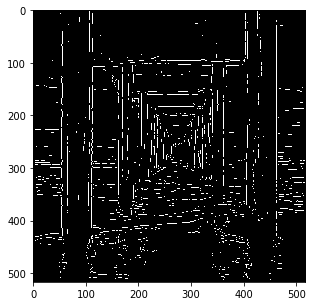

In [24]:
thresholded = hysteresis_threshold(nms_image, g_theta)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

## Problem 3 Corner detection [13 pts]

### Problem 3.1 [12 pts]
In this problem, we are going to build a corner detector. This should be done according to the lecture slides. You should fill in the function <code>corner_detect</code> below, which takes as input <code>image, nCorners, smoothSTD, windowSize</code> -- where `smoothSTD` is the standard deviation of the smoothing kernel and `windowSize` is the window size for corner detector and non-maximum suppression. In the lecture, the corner detector was implemented using a hard threshold. Do not do that; instead, return the `nCorners` strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with `nCorners` = 20) and display outputs as shown below. You may find `scipy.ndimage.filters.gaussian_filter` helpful for smoothing.

In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughout all of the experiments in this assignment.

There will be a total of 16 images as outputs: 4 choices of `smoothSTD` x 2 `matrix` images x 2 `warrior` images.

![dinoCorner1](dinoCorner1.png)
![dinoCorner2](dinoCorner2.png)



In [1291]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy import ndimage
np.seterr(divide='ignore', invalid='ignore')
import imageio
from scipy.signal import convolve

def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def gradient(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Initialize Gradient Magnitude
    g_mag = np.zeros((image.shape[0], image.shape[1]))
    
    # Initialize Gradient Angle
    g_theta = np.zeros((image.shape[0], image.shape[1]))
    
    # Define dx Kernel in the x direction
    dx_kernel = np.array([[-1/2, 0, 1/2]])
    
    # Define dy Kernel in the y direction
    dy_kernel = np.transpose(dx_kernel)
    
    # Determine Gx and Gy
    #G_x = ndimage.filters.convolve(image, dx_kernel)
    #G_y = ndimage.filters.convolve(image, dy_kernel)
    G_x = conv(image, dx_kernel)
    G_y = conv(image, dy_kernel)
    
    # Determine g_mag
    g_mag = np.sqrt(G_x**2 + G_y**2)
    
    # Determine g_theta
    g_theta = np.arctan(G_y / G_x)
    
    return G_x, G_y


In [794]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non-maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # Get the size of the image
    Height, Width = image.shape
    
    # Filter the image with the Gaussian.
    smoothen_image = gaussian_filter(image, smoothSTD)
    
    # Obtain the gradients in x and y directions
    #I_x, I_y = np.gradient(smoothen_image)
    I_x, I_y = gradient(smoothen_image)
    
    # Determine I_x^2, I_y^2, and I_xy
    I_x_sq = I_x**2
    I_y_sq = I_y**2
    I_xy = I_x * I_y
    
    # Initialize Corners Matrix that stores measurement image, R = min(lamda_1, lamda_2) for each pixel.
    Corners_mat = np.zeros_like(image)
            
    # Find all the corners in the image
    for h in range(Height):
        for w in range(Width):
            
            # Check the offsets before assigning the index
            # Starting index of Height
            if h - windowSize//2 < 0:
                initial_h = 0
            else:
                initial_h = h - windowSize//2
            # Last index of Height
            if h + windowSize//2 > Height:
                last_h = Height
            else:
                last_h = h + windowSize//2   
            # Starting index of Width
            if w - windowSize//2 < 0:
                initial_w = 0
            else:
                initial_w = w - windowSize//2
            # Last index of Width
            if w + windowSize//2 > Width:
                last_w = Width
            else:
                last_w = w + windowSize//2   
            
            # Window of I_x_sq
            window_I_x_sq = I_x_sq[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_x_sq = np.sum(window_I_x_sq)
            
            # Window of I_y_sq
            window_I_y_sq = I_y_sq[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_y_sq = np.sum(window_I_y_sq)
            
            # Window of I_xy
            window_I_xy = I_xy[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_xy = np.sum(window_I_xy)
            
            # Construct spatial gradient matrix, M
            M = np.array([[sum_I_x_sq, sum_I_xy],[sum_I_xy, sum_I_y_sq]])
            
            # Compute measurement image R
            R = min(np.linalg.eigvals(M))
            
            # Store it in Corners matrix.
            Corners_mat[h, w] = R
            
    
    # Implement Non-maximum Supression method on the corners list
    Corners_list_NMS = []
    
    for h in range(windowSize//2+1, Height-windowSize//2-1, windowSize):
        for w in range(windowSize//2+1, Width-windowSize//2-1, windowSize):
            
            # Check the offsets before assigning the index
            # Starting index of Height
            if h - windowSize//2 < windowSize//2+1:
                initial_h = windowSize//2+1
            else:
                initial_h = h - windowSize//2
            # Last index of Height
            if h + windowSize//2 > Height - windowSize//2-1:
                last_h = Height - windowSize//2-1
            else:
                last_h = h + windowSize//2   
            # Starting index of Width
            if w - windowSize//2 < windowSize//2+1:
                initial_w = windowSize//2+1
            else:
                initial_w = w - windowSize//2
            # Last index of Width
            if w + windowSize//2 > Width - windowSize//2-1:
                last_w = Width - windowSize//2-1
            else:
                last_w = w + windowSize//2
            
            # Contruct Eigenvalues Matrix
            eigens_mat = Corners_mat[initial_h: last_h, initial_w: last_w]
            
            # Find the local maxima
            local_maxima_eigen = max(eigens_mat.flatten())
            
            # Search every elements of the Eigenvalues Matrix
            for i in range (eigens_mat.shape[0]):
                for j in range (eigens_mat.shape[1]):
                    
                    # If the element is the local maxima
                    if eigens_mat[i, j] == local_maxima_eigen:
                        
                        # Pass the value to the corners list.
                        Corners_list_NMS.append((local_maxima_eigen,(initial_w + j, initial_h + i)))
                        continue
    
    # Sort the list from smallest to largest         
    Corners_list_NMS.sort()
    
    # Then, reverse the list to arrange it from largest to smallest.
    Corners_list_NMS.reverse()
    
    # Initialize the final corners matrix, set to data type to integer
    corners = np.zeros((nCorners, 2), dtype='int')
    
    # Past the final corners list to the corners array.
    for counter in range(0, corners.shape[0]):
        
        corners[counter, :] = Corners_list_NMS[counter][1]
    
    return corners

smooth stdev: 0.5
window size: 3


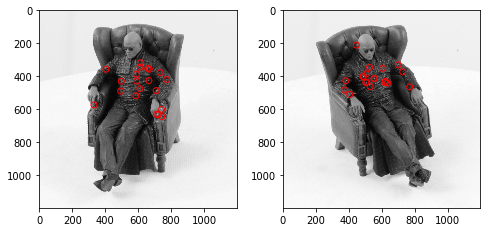

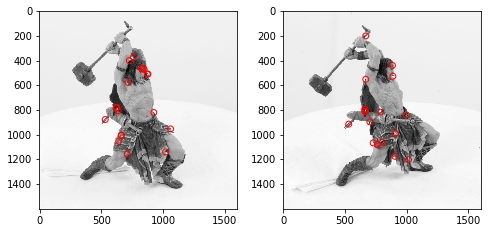

smooth stdev: 1
window size: 7


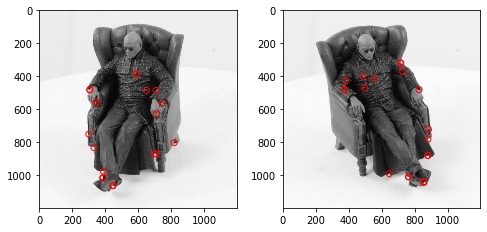

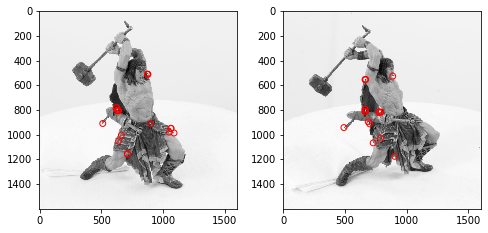

smooth stdev: 2
window size: 13


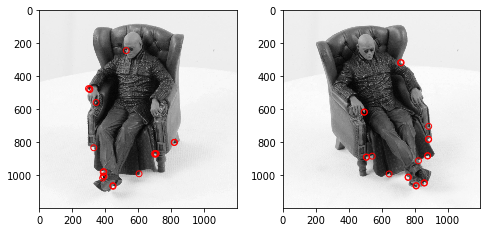

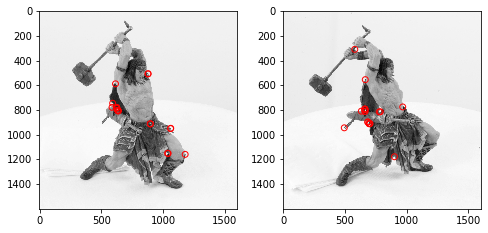

smooth stdev: 4
window size: 25


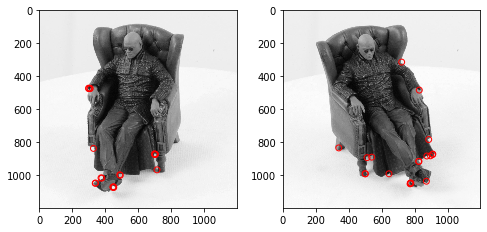

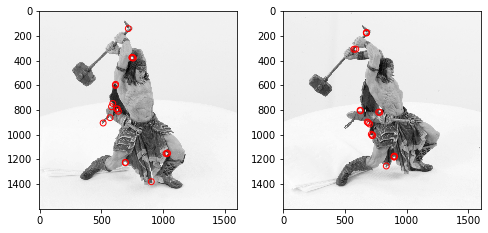

In [546]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

for smoothSTD in (0.5, 1, 2, 4):
    windowSize = int(smoothSTD * 6)
    if windowSize % 2 == 0:
        windowSize += 1
        
    print('smooth stdev: %r' % smoothSTD)
    print('window size: %r' % windowSize)

    nCorners = 20

    # read images and detect corners on images
    
    #imgs_din = []
    #crns_din = []
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []
    
    for i in range(2):
        #img_din = imageio.imread('dino/dino' + str(i) + '.png')
        #imgs_din.append(rgb2gray(img_din))
        # downsize your image in case corner_detect runs slow in test
        # imgs_din.append(rgb2gray(img_din)[::2, ::2])
        #crns_din.append(corner_detect(imgs_din[i], nCorners, smoothSTD, windowSize))

        img_mat = imageio.imread('matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))
        # downsize your image in case corner_detect runs slow in test
        # imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

    #show_corners_result(imgs_din, crns_din)
    show_corners_result(imgs_mat, crns_mat)
    show_corners_result(imgs_war, crns_war)

### Problem 3.2 [1 pts]
Comment on your results and observations. You don't need to comment per output; just discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pairs of images (warrior and matrix). Also discuss whether you are able to find corresponding corners for the pairs of images.

###### **Solution:**<br>

Based on the generated images above, as the size of the window increases, the corner points are farther away and more scattered. Besides that, as the standard deviation increases, the noises in the images decreases; however, the weak corners and weak edges in the images became less visible or completely non-visible as the standard deviation increases. For instance, the corner points that are on the shirt of Morpheus from the Matrix movie disappeared,as the standard deviation increases from 0.5 to 4.

## Problem 4 Epipolar rectification and feature matching [43 pts]

### 4.1 Epipolar rectification [22 pts]

In this problem, we are going to perform epipolar rectification. Given calibrated stereo cameras (i.e., calibration matrices $K_1$ and $K_2$, camera rotation matrices $R_1$ and $R_2$, camera translation vectors $t_1$ and $t_2$), you are expected to determine the rotation matrix $R$ and calibration matrix $K$ of the virtual cameras.
Your goal is to complete the function $epipolarRecification$, which determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two images acquired by the cameras. The destination virtual cameras have the same centers as the source real cameras. 


#### 4.1.1 Camera translation matrices and Projective Transformation matrices [6 pts]
To calculate the camera translation from cameras with the same camera center, you will have to complete the $cameraTranslation$ first. 
Another function you need to complete is $calcProjectiveTransformation$, which calculates the planar projective transformation from cameras with the same camera center.
The camera calibration matrix (same for both cameras) will be calculated by $calcDestinateK$. This is provided for you.
To get the rotation matrix $R$ of the virtual camera, we usually interpolate halfway between the two 3D rotations embodied by $R_1$ and $R_2$. For simplicity, this will be also given to you.

In [3]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from math import floor, ceil

In [4]:
def cameraTranslation(R1, t1, R2):
    '''
    Calculate the camera translation from cameras with the same camera center.
    
    Args: 
    R1: The rotation matrix of the first camera.
    t1: The translation vector of the first camera.
    R2: The rotation matrix of the second camera.
    
    Returns:
    The translation vector of the second camera.
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Transpose R1
    R1_transpose = np.transpose(R1)
    
    # Calculate the translation vector of the second camera, t2
    # given that the camera translation from cameras with the same camera center, t = 0
    t2 = np.dot(np.dot(R2, R1_transpose), t1)
    
    return t2
    

In [5]:
def calcProjectiveTransformation(K1, R1, K2, R2):
    
    '''
    Calculates the planar projective transformation from cameras with the same camera center.
    This function determines the planar projective transformation from the image of a 3D point in the first camera 
    to its image in the second camera where P1 = K1 * R1 * [I | -C] and P2 = K2 * R2 * [I | -C].
    
    Args:
    K1: The calibration matrix of the first camera.
    R1: The rotation matrix of the first camera.
    K2: The calibration matrix of the second camera.
    R2: The rotation matrix of the second camera.
    
    Returns:
    The transformation matrix.
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Calculate the transpose of R1.
    R1_transpose = np.transpose(R1)
    
    # Calculate the inverse of K1.
    K1_inv = np.linalg.inv(K1)
    
    # Calculate the rectification of the transformation matrix
    H = np.dot(np.dot(np.dot(K2, R2), R1_transpose), K1_inv)
    
    #print(H)
    
    return H
    
    

In [6]:
def calcDestinateK(srcK1, srcK2):
    '''
    Camera calibration matrix (same for both cameras)
    '''
    alpha = (srcK1[0][0] + srcK2[0][0] + srcK1[1][1] + srcK2[1][1]) // 4 
    x0 = (srcK1[0][2] + srcK2[0][2]) // 2
    y0 = (srcK1[1][2] + srcK2[1][2]) // 2
    dstK = np.zeros((3, 3))
    dstK[0][0] = alpha
    dstK[0][2] = x0
    dstK[1][1] = alpha
    dstK[1][2] = y0
    dstK[2][2] = 1
    return dstK

In [7]:
def epipolarRecification(srcK1, srcR1, src_t1, 
                         srcK2, srcR2, src_t2, dstR):
    '''
    Given two calibrated cameras, this function determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two image acquired by the cameras.  The destination cameras have the same centers as the source cameras.
    
    Args:
    srcK1: The calibration matrix of the first source camera.
    srcR1: The rotation matrix of the first source camera.
    src_t1: The translation vector of the first source camera.
    srcK2: The calibration matrix of the second source camera.
    srcR2: The rotation matrix of the second source camera.
    src_t2: The translation vector of the second source camera.
    dstR: The rotation matrix of the destination cameras.
    
    Returns: 
    dstK: The calibration matrix of the destination cameras.
    dst_t1: The translation vector of the first destination camera.
    dst_t2: The translation vector of the second destination camera.
    H1, H2: The image rectification transformation matrices.
    '''
    
    dst_t1 = cameraTranslation(srcR1, src_t1, dstR)
    dst_t2 = cameraTranslation(srcR2, src_t2, dstR)
    
    dstK = calcDestinateK(srcK1, srcK2)
    
    H1 = calcProjectiveTransformation(srcK1, srcR1, dstK, dstR)
    H2 = calcProjectiveTransformation(srcK2, srcR2, dstK, dstR)
   
    return dstK, dst_t1, dst_t2, H1, H2
    


#### Problem 4.1.2 Warp Image [10 pts]
After calling $epipolarRectification$, we can get the projective transformation matrices $H1$ and $H2$. Next, we will geometrically transform (i.e., 'warp') the image so that the epipolar lines are image rows. You have to complete $warpImage$ using the backward method in Lecture 7. Note the destination images are required to be the same size as the source images.

In [15]:
# convert points from euclidean to homogeneous
def to_homog(points): #here always remember that points is a 3x4 matrix
    # write your code here
    
    # Determine Number of Columns (i.e., number of coordinates)
    num_Points = points.shape[1]
    
    # Generate an array with ones 
    array_of_ONES = np.ones(num_Points)
    
    # Stack the points matrix with the array with ones.
    homo_points = np.vstack([points, array_of_ONES])
    
    return homo_points

# convert points from homogeneous to euclidean
def from_homog(points_homog):
    # write your code here
    
    # Change the matrix data type to float
    points_homog = points_homog.astype(float)
    
    # Extract the last row of the array.
    array_of_Ws = points_homog[-1,:]
    
    # Determine the number of rows of the matrix.
    num_rows = points_homog.shape[0]
    
    # Delete the last row of the points_homog matrix.
    euclid_points = np.delete(points_homog, num_rows-1, axis=0)
    
    # Divide the coordinates with its own w.
    for col in range(len(array_of_Ws)):
        for row in range(euclid_points.shape[0]):
            euclid_points[row, col] = euclid_points[row, col] / array_of_Ws[col]
    
    return euclid_points


def warpImage(image, H, out_height, out_width):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.
    
    Args: 
    image: Image to warp
    H: The image rectification transformation matrices.
    out_height, out_width: The shape of output image.
    
    Returns:
    Out: An inverse warp of the image, given a homography.
    min_x, min_y, max_x, max_y: The minimum/maxmum of warped image bound.
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the Image Size
    Height, Width, Channel = image.shape
    
    # Prevent from clipping input data.
    img = image/np.max(image)
    
    # Top Left Corner of the Source Image Homogeneous Coordinate
    c_s_top_left = np.array([[0],[0],[1]])
    # Top Right Corner of the Source Image Homogeneous Coordinate
    c_s_top_right = np.array([[Width - 1], [0],[1]])
    # Bottom Left Corner of the Source Image Homogeneous Coordinate
    c_s_bottom_left = np.array([[0],[Height - 1],[1]])
    # Bottom Right Corner of the Source Image Homogeneous Coordinate
    c_s_bottom_right = np.array([[Width - 1], [Height - 1],[1]])
    
    # Top Left Corner of the Target Image Homogeneous Coordinate
    c_t_top_left = np.dot(H, c_s_top_left)
    # Convert back to 2D
    c_t_top_left_2D = from_homog(c_t_top_left)
    
    # Top Right Corner of the Target Image Homogeneous Coordinate
    c_t_top_right = np.dot(H, c_s_top_right)
    # Convert back to 2D
    c_t_top_right_2D = from_homog(c_t_top_right)
    
    # Bottom Left Corner of the Target Image Homogeneous Coordinate
    c_t_bottom_left = np.dot(H, c_s_bottom_left)
    # Convert back to 2D
    c_t_bottom_left_2D = from_homog(c_t_bottom_left)
    
    # Bottom Right Corner of the Target Image Homogeneous Coordinate
    c_t_bottom_right = np.dot(H, c_s_bottom_right)
    # Convert back to 2D
    c_t_bottom_right_2D = from_homog(c_t_bottom_right)
    
    # Combine the c_ts (2 x 4)
    c_t_mat = np.concatenate((c_t_top_left_2D, c_t_top_right_2D, c_t_bottom_left_2D, c_t_bottom_right_2D), axis=1)
    
    # Find min of height and width
    min_y = int(floor(c_t_mat.min(axis=1)[1]))
    min_x = int(floor(c_t_mat.min(axis=1)[0]))
    
    # Find max of height and width
    max_y = int(ceil(c_t_mat.max(axis=1)[1]))
    max_x = int(floor(c_t_mat.max(axis=1)[0]))
    
    # Size of the Bounding Box
    #height_box = abs(max_y - min_y) + 1
    #width_box = abs(max_x - min_x) + 1
    
    # Initialize output image (H x W x 3)
    #out = np.zeros(image.shape)
    out = np.zeros((out_height, out_width, Channel))
    #print(out.shape)
    
    # Compute inverse of the rectification transformation matrix, H
    H_inv = np.linalg.inv(H)
    
    for h in range(0, out_height):
        for w in range(0, out_width):
            
            # Convert to A Homogeneous Coordinate
            p_t_homog = to_homog(np.array([[w], [h]]))
            
            # Get the estimated source pixel coordinate
            p_s_w, p_s_h = from_homog(np.dot(H_inv, p_t_homog))
            
            # If ps is within source image, copy I(ps) to T(pt)
            #if (0 <= int(p_s_h) < out_height) and (0 <= int(p_s_w)< out_width):
            if (0 <= int(p_s_h) < Height) and (0 <= int(p_s_w)< Width):
                                                   
                out[h, w, :] = img[int(p_s_h), int(p_s_w), :]
    
    return out, min_x, min_y, max_x, max_y

In [16]:
file_param = open('param.pkl', 'rb')
param = pickle.load(file_param)
file_param.close()
srcK1, srcR1, src_t1 = param['srcK1'], param['srcR1'], param['src_t1']
srcK2, srcR2, src_t2 = param['srcK2'], param['srcR2'], param['src_t2']
dstR = param['dstR']


In [17]:
dstK, dst_t1, dst_t2, H1, H2 = epipolarRecification(srcK1, srcR1, src_t1, 
                                                    srcK2, srcR2, src_t2, dstR)

Original image 1:


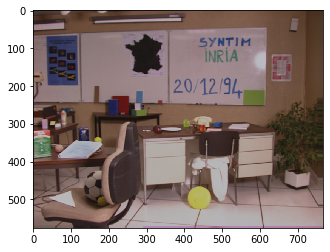

In [18]:
src1 = imread('Sport0_OG0.bmp')
plt.imshow(src1)
print('Original image 1:')

Unbounded Rectified image 1:


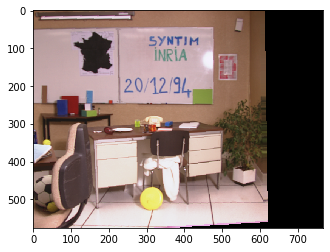

In [19]:
height1, width1, _ = src1.shape
rectified_im1_unbounded, min_x1, min_y1, max_x1, max_y1 = warpImage(src1, H1, height1, width1)
plt.imshow(rectified_im1_unbounded)
print('Unbounded Rectified image 1:')

Original image 2:


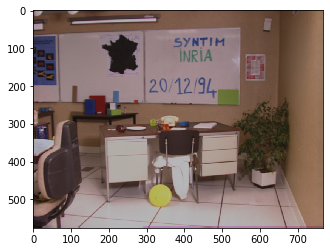

In [20]:
src2 = imread('Sport1_OG0.bmp')
plt.imshow(src2)
print('Original image 2:')

Unbounded Rectified image 2:


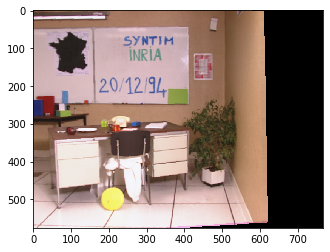

In [21]:
height2, width2, _ = src2.shape
rectified_im2_unbounded, min_x2, min_y2, max_x2, max_y2 = warpImage(src2, H2, height2, width2)
plt.imshow(rectified_im2_unbounded)
print('Unbounded Rectified image 2:')

#### 4.1.3 Partial bounded retification [3 pts]
In the resulting images, although they are epipolar rectified, you should observe portions of the source images being transformed "out of bounds" of the destination images.
To fix this problem, we can introduced a 2D transformation containing a translation (i.e., $T1$ and $T2$). 
$$T1 = \begin{bmatrix}
1 & 0 & -min\_x1 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$$T2 = \begin{bmatrix}
1 & 0 & -min\_x2 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$H1$, $H2$ can be updated by left multiplying $T1$, $T2$, respectivley. Again, geometrically tranform the images under the updated $H1$, $H2$. The destination image is required to be the same size as the source images. In the resulting images, although they are (still) epipolar rectified, you should observe the portions of the source images being transformed are no longer "out of bounds" on the top and left of the destination images.

In [22]:
def partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2):
    '''
    Update the projective transformation matries so that the rectified images are no longer 'out of bound'. 
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    # Initialize T1 and T2
    T1 = np.eye(3)
    T2 = np.eye(3)
    
    # Construct T1 as stated
    T1[0, 2] = - min_x1 - 0.5
    T1[1, 2] = - min(min_y1, min_y2) - 0.5
    
    # Construct T2 as stated
    T2[0, 2] = - min_x2 - 0.5
    T2[1, 2] = - min(min_y1, min_y2) - 0.5
    
    # Bounded H1
    H1_bounded = np.dot(H1, T1)
    
    # Bounded H2
    H2_bounded = np.dot(H2, T2)
    
    return H1_bounded, H2_bounded

The partial bounded rectified image 1:


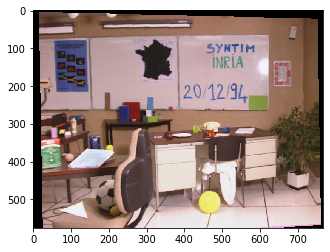

In [23]:
H1_bounded, H2_bounded = partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2)
rectified_im1_bounded, min_x1_bounded, min_y1_bounded, max_x1_bounded, max_y1_bounded = warpImage(src1, H1_bounded, height1, width1)
plt.imshow(rectified_im1_bounded)
print('The partial bounded rectified image 1:')

The partial bounded rectified image 2:


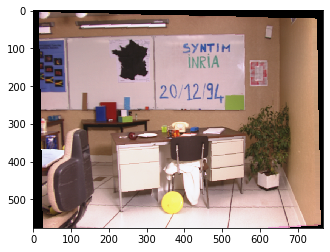

In [24]:
rectified_im2_bounded, min_x2_bounded, min_y2_bounded, max_x2_bounded, max_y2_bounded = warpImage(src2, H2_bounded, height2, width2)
plt.imshow(rectified_im2_bounded)
print('The partial bounded rectified image 2:')

#### 4.1.4 Completely bounded rectification [3 pts]
Finally, determine the size of the destination images that completely bound the transformed images. Again geometrically transform the images under the updated 2D projective transformation matrices $H1$ and $H2$ (these are not updated a second time). You should complete the function $completelyBoundedRectification$. The destination images are required to be the size you just calculated. In the resulting images, you should observe the source images being transformed such that they are epipolar rectified and are completely bounded.

In [25]:
def completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,
                                   min_x1_bounded, max_x1_bounded, 
                                   min_y1_bounded, max_y1_bounded):
    '''
    Determine the size of the destination images (same size for both) that completely bound the transformed images. geometrically transform the images under the updated 2D projective transformation matrices H1 and H2 (these are not updated a second time).
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    # Fine tune height and width
    #h_offset = 20
    #w_offset = - 45
    
    # Determine the width size of the destination image
    dest_img_width = abs(max_x1_bounded - min_x1_bounded)
    
    # Determine the height size of the destination image
    dest_img_height = abs(max_y1_bounded - min_y1_bounded)
    
    # Fully rectify the first image
    rectified_im1_final, _, _, _, _ = warpImage(src1, H1_bounded, dest_img_height, dest_img_width)
    
    # Fully rectify the second image
    rectified_im2_final, _, _, _, _ = warpImage(src2, H2_bounded, dest_img_height, dest_img_width)
    
    return rectified_im1_final, rectified_im2_final

The completely bounded rectified image 1:


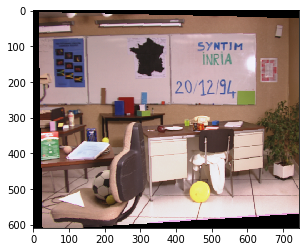

In [26]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,
                                   min_x1_bounded, max_x1_bounded, 
                                   min_y1_bounded, max_y1_bounded)

plt.imshow(rectified_im1_final)
print('The completely bounded rectified image 1:')

The completely bounded rectified image 2:


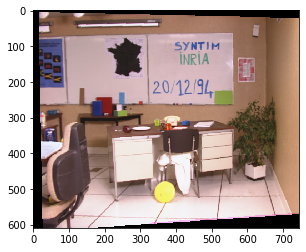

In [27]:
plt.imshow(rectified_im2_final)
print('The completely bounded rectified image 2:')

### Problem 4.2 Feature matching [3 pts]
#### 4.2.1 SSD (Sum Squared Distance) Matching [1 pts]
Complete the function <code>ssdMatch</code>:  
SSD = $\sum_{x,y}|W_1(x,y)-W_2(x,y)|^2$

In [764]:
def ssdMatch(img1, img2, c1, c2, R):
    """Compute SSD given two windows.
    
    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        SSD matching score for two input windows.
        
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the window size.
    windowSize = 2 * R + 1
    
    # Obtain the W_1 Matrix
    W_1 = img1[c1[1] - windowSize//2: c1[1] + windowSize//2+1, c1[0] - windowSize//2: c1[0] + windowSize//2+1]
    
    # Obtain the W_2 Matrix
    W_2 = img2[c2[1] - windowSize//2: c2[1] + windowSize//2+1, c2[0] - windowSize//2: c2[0] + windowSize//2+1]
    
    # Calculate the matching score
    matching_score = np.sum(np.square(abs(W_1 - W_2)))
   
    return matching_score

In [765]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 20
print(ssdMatch(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 30
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 46

20
30
46


#### Problem 4.2.2 NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.

NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$

where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [850]:
def normalize_window(window):
    _mean = np.mean(window)
    _stdev = np.sqrt(np.sum((window - _mean) ** 2))
    return (window - _mean) / (_stdev + 1e-6)

def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the window size.
    windowSize = 2 * R + 1
    
    # Obtain the W_1 Matrix
    W_1 = img1[c1[1] - windowSize//2: c1[1] + windowSize//2+1, c1[0] - windowSize//2: c1[0] + windowSize//2+1]
    
    # Obtain the W_2 Matrix
    W_2 = img2[c2[1] - windowSize//2: c2[1] + windowSize//2+1, c2[0] - windowSize//2: c2[0] + windowSize//2+1]
    
    # Normalize W_1 Matrix
    W_1_norm = normalize_window(W_1)
    
    # Normalize W_2 Matrix
    W_2_norm = normalize_window(W_2)
    
    # Calculate the matching score
    ncc_matching_score = np.sum(W_1_norm * W_2_norm)
    
    return ncc_matching_score
    

In [851]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])

print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546

print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457

print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546545625645379
0.8457612741588395
0.6258687824662955


### Problem 4.3 Naive Matching [8 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondences. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation.

Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose the number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code.

**Properly label or mention which output corresponds to which choice of number of corners. The total number of outputs is 6 images:** (3 choices of number of corners for each of `matrix` and `warrior`), where each figure might look like the following:

**Number of corners: 10**
<img src = "dinoMatch.png" alt="dino match" width="800"/>

In [1275]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Initialize the matching list that stores matching pairs
    matching = []
    
    # Determine n of corners1
    n_Corners1 = corners1.shape[0]
    
    # Determine n of corners2
    n_Corners2 = corners2.shape[0]
    
    
    for counter_1 in range(n_Corners1):
        
        # Initialize maximum score for every new corner 1
        #maximum_NCC_Score = 0
        maximum_NCC_Score = None
        
        # Clear the matched pair tuple
        matched_Pair = None
        
        # Start with first corner of the image 1
        corner_1 = corners1[counter_1]
        
        for counter_2 in range(n_Corners2):
            
            # Compare all different corners2 with corner_1
            corner_2 = corners2[counter_2]
            
            # Calculate NCC Matching Score
            ncc_matching_score = ncc_match(img1, img2, corner_1, corner_2, R)
            
            # If the current matching NCC score is more than previous Maximum matching NCC score
            if (maximum_NCC_Score is None) or (ncc_matching_score > maximum_NCC_Score):
                
                # Override the maximum NCC matching score
                maximum_NCC_Score = ncc_matching_score
                
                # Store the matching pair.
                matched_Pair = (corner_1, corner_2)
                
        # If the maximum NCC matching score is more than the NCC threshold
        if maximum_NCC_Score >= NCCth:
            
            # Store in the matching list
            matching.append(matched_Pair)
            
        # Clear the matched pair tuple
        #matched_Pair = ()
    
    return matching

In [1276]:
# detect corners on warrior and matrix sets
# you are free to modify code here, create your helper functions, etc.

def corners_generator(nCorners):
    
    #nCorners = 20  # do this for 10, 20 and 30 corners
    smoothSTD = 1
    windowSize = 17

    # read images and detect corners on images

    #imgs_sport = []
    #crns_sport = []
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []

    for i in range(2):
        
        #img_sport = imageio.imread('Sport' + str(i) + '_OG0.bmp')
        #imgs_sport.append(rgb2gray(img_sport))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        #crns_sport.append(corner_detect(imgs_sport[i], nCorners, smoothSTD, windowSize))
        
        
        #img_din = imageio.imread('dino/dino' + str(i) + '.png')
        #imgs_din.append(rgb2gray(img_din))
        # downsize your image in case corner_detect runs slow in test
        # imgs_din.append(rgb2gray(img_din)[::2, ::2])
        #crns_din.append(corner_detect(imgs_din[i], nCorners, smoothSTD, windowSize))

        img_mat = imageio.imread('matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))
        # downsize your image in case corner_detect runs slow in test
        # imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
        
    #show_corners_result(imgs_din, crns_din)
    #show_corners_result(imgs_mat, crns_mat)
    #show_corners_result(imgs_war, crns_war)
    return imgs_mat, crns_mat, imgs_war, crns_war
    

In [1277]:
# match corners
def matching_results(NCCth_mat, NCCth_war, imgs_mat, crns_mat, imgs_war, crns_war):
    
    R = 16

    #NCCth = 0.6  # put your threshold here
    #NCCth_mat = 0.05 # Matrix NCC Threshold
    #NCCth_war = 0.5 # Warrior NCC Threshold


    """matching_sport = naive_matching(imgs_sport[0]/255,
                                imgs_sport[1]/255, 
                                crns_sport[0], 
                                crns_sport[1], 
                                R, NCCth)"""

    #print(matching_sport)

    #for pair_Num in range(0, len(matching_sport)):
    
        #print(matching_sport[pair_Num][1])
    
    matching_mat = naive_matching(imgs_mat[0]/255,
                                    imgs_mat[1]/255, 
                                    crns_mat[0], 
                                    crns_mat[1], 
                                    R, NCCth_mat)

    matching_war = naive_matching(imgs_war[0]/255,
                                    imgs_war[1]/255, 
                                    crns_war[0], 
                                    crns_war[1], 
                                    R, NCCth_war)
    
    return matching_mat, matching_war

Number of Corners: 10


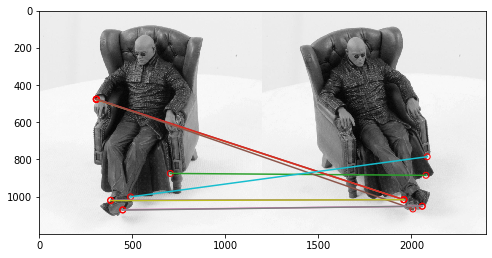

Number of Corners: 10


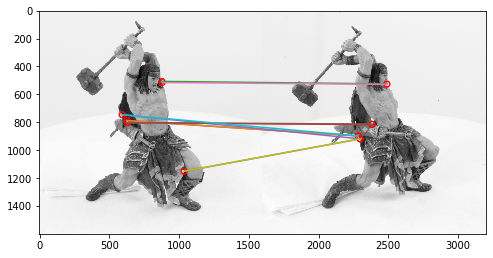

Number of Corners: 20


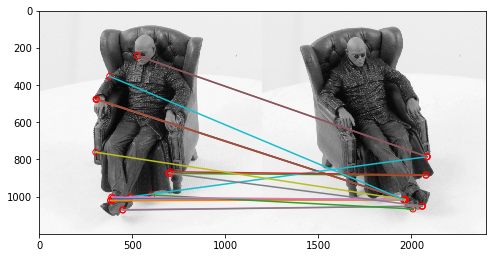

Number of Corners: 20


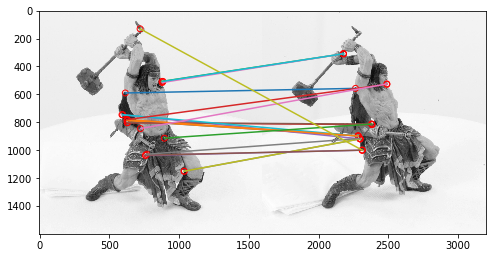

Number of Corners: 30


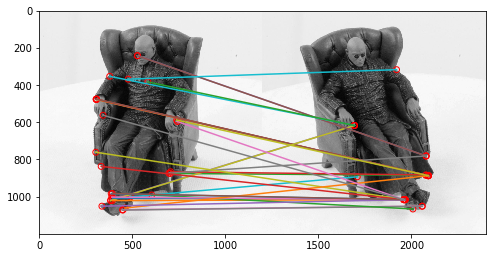

Number of Corners: 30


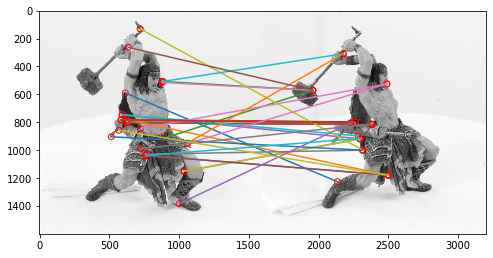

In [1278]:
# plot matching result
def show_matching_result(img1, img2, matching, nCorners):
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Set figure size
    fig = plt.figure(figsize=(8, 8))
    
    print("Number of Corners:", nCorners)
    
    # Tile images
    tiled_image = np.concatenate((img1, img2),axis = 1)
    
    # Plot the tiled image in gray scale
    plt.imshow(tiled_image, cmap = 'gray')
    
    for pair_Num in range(0, len(matching)):
        
        # Plot the first corners of the pair on the first image
        plt.scatter(matching[pair_Num][0][0], matching[pair_Num][0][1], s=35, edgecolors='r', facecolors='none')
        
        # Plot the second corners of the pair on the second image
        plt.scatter(matching[pair_Num][1][0] + img1.shape[1], matching[pair_Num][1][1], s=35, edgecolors='r', facecolors='none')
    
        # Matching corners plot with image 1 and image 2
        plt.plot([matching[pair_Num][0][0], matching[pair_Num][1][0] + img1.shape[1]], [matching[pair_Num][0][1], matching[pair_Num][1][1]] )
        
    # Show plots    
    plt.show()
    
# Generate 10 corners for the matrix and Thor images
imgs_mat_10, crns_mat_10, imgs_war_10, crns_war_10 = corners_generator(10)

# Output matching pairs for the matrix and Thor images
# Set Matrix's NCC threshold = 0.025 and Thor's NCC threshold = 0.25
matching_mat_10, matching_war_10 = matching_results(0.025, 0.25, imgs_mat_10, crns_mat_10, imgs_war_10, crns_war_10)

# Plot results
#show_matching_result(imgs_sport[0], imgs_sport[1], matching_sport)
show_matching_result(imgs_mat_10[0], imgs_mat_10[1], matching_mat_10, 10)
show_matching_result(imgs_war_10[0], imgs_war_10[1], matching_war_10, 10)


# Generate 20 corners for the matrix and Thor images
imgs_mat_20, crns_mat_20, imgs_war_20, crns_war_20 = corners_generator(20)

# Output matching pairs for the matrix and Thor images
# Set Matrix's NCC threshold = 0.025 and Thor's NCC threshold = 0.25
matching_mat_20, matching_war_20 = matching_results(0.025, 0.25, imgs_mat_20, crns_mat_20, imgs_war_20, crns_war_20)

# Plot results
#show_matching_result(imgs_sport[0], imgs_sport[1], matching_sport)
show_matching_result(imgs_mat_20[0], imgs_mat_20[1], matching_mat_20, 20)
show_matching_result(imgs_war_20[0], imgs_war_20[1], matching_war_20, 20)


# Generate 30 corners for the matrix and Thor images
imgs_mat_30, crns_mat_30, imgs_war_30, crns_war_30 = corners_generator(30)

# Output matching pairs for the matrix and Thor images
# Set Matrix's NCC threshold = 0.025 and Thor's NCC threshold = 0.25
matching_mat_30, matching_war_30 = matching_results(0.025, 0.25, imgs_mat_30, crns_mat_30, imgs_war_30, crns_war_30)

# Plot results
#show_matching_result(imgs_sport[0], imgs_sport[1], matching_sport)
show_matching_result(imgs_mat_30[0], imgs_mat_30[1], matching_mat_30, 30)
show_matching_result(imgs_war_30[0], imgs_war_30[1], matching_war_30, 30)

### Problem 4.4 Matching using epipolar geometry [10 pts]
Next, we will use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners in image1. Then, for each corner, do a line search along the corresponding parallel epipolar line in image2.

Evaluate the NCC score for each point along this line and return the best match (or no match if all scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.

You do not have to run this in both directions. Show your result as in the naive matching part. 

In [1297]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence
    """
    
    """ ==========
    YOUR CODE HERE
    You may want to refer to the `show_matching_result` function.
    ========== """
    # Set figure size
    fig = plt.figure(figsize=(8, 8))
    
    print("Number of Corners: ", len(corrs))
    
    # Tile images
    tiled_image = np.concatenate((img1, img2),axis = 1)
    
    # Plot the tiled image in gray scale
    plt.imshow(tiled_image, cmap = 'gray')
    
    for pair_Num in range(0, len(corrs)):
        
        # Plot the first corners of the pair on the first image
        plt.scatter(corrs[pair_Num][0][0], corrs[pair_Num][0][1], s=35, edgecolors='r', facecolors='none')
        
        # Plot the second corners of the pair on the second image
        plt.scatter(corrs[pair_Num][1][0] + img1.shape[1], corrs[pair_Num][1][1], s=35, edgecolors='r', facecolors='none')
    
        # Matching corners plot with image 1 and image 2
        plt.plot([corrs[pair_Num][0][0], corrs[pair_Num][1][0] + img1.shape[1]], [corrs[pair_Num][0][1], corrs[pair_Num][1][1]] )
        
    # Show plots    
    plt.show()
    

def correspondence_matching_epipole(img1, img2, corners1, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    Returns:
        Matching result to be used in display_correspondence function
    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Initialize the matching list that stores matching pairs
    matching = []
    
    # Determine the total number of corners1
    # corners1 (n x 2)
    num_Corners1 = corners1.shape[0]
    # transpose corners1 to (2 x n)
    corners1 = corners1.T
    
    # Matching corners1's corners with image 2 windows of pixels.
    for corner_ID in range(0, num_Corners1):
        
        # Initialize maximum score for every new corner 1
        maximum_NCC_Score = None
        
        # Clear the matched pair tuple
        matched_Pair = None
        
        for h in range(R, img2.shape[0] - R):
            
            for w in range(R, img2.shape[1] - R):
                
                # Get corners1's corner
                corner_1 = corners1[:2, corner_ID].astype(np.int32)
                
                # Get corner 2 from image 2
                corner_2 = np.array([w, h]).astype(np.int32)
                
                # Calculate NCC Matching Score
                ncc_matching_score = ncc_match(img1, img2, corner_1, corner_2, R)
                
                # If the current matching NCC score is more than previous Maximum matching NCC score
                if (maximum_NCC_Score is None) or (ncc_matching_score > maximum_NCC_Score):
                
                    # Override the maximum NCC matching score
                    maximum_NCC_Score = ncc_matching_score
                    
                    # Store the matching pair.
                    matched_Pair = (corner_1, corner_2)
                
        # If the maximum NCC matching score is more than the NCC threshold
        if maximum_NCC_Score >= NCCth:
            
            # Store in the matching list
            matching.append(matched_Pair)
            
    return matching


In [1281]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, 
                                                                          H1_bounded, H2_bounded,
                                                                          min_x1_bounded, 
                                                                          max_x1_bounded, 
                                                                          min_y1_bounded, 
                                                                          max_y1_bounded)


Number of Corners:  30


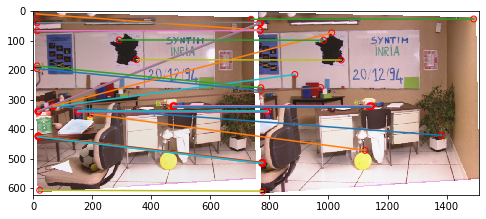

In [1302]:
# replace black pixels with white pixels
_black_idxs = (rectified_im1_final[:, :, 0] == 0) & (rectified_im1_final[:, :, 1] == 0) & (rectified_im1_final[:, :, 2] == 0)
rectified_im1_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]
_black_idxs = (rectified_im2_final[:, :, 0] == 0) & (rectified_im2_final[:, :, 1] == 0) & (rectified_im2_final[:, :, 2] == 0)
rectified_im2_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]

#nCorners = 20
nCorners = 30
# Choose your threshold and NCC matching window radius
NCCth = 0.6
R = 10
# detect corners using corner detector here, store in corners1
corners1 = corner_detect(rgb2gray(rectified_im1_final), nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im1_final, rectified_im2_final, corners1, R, NCCth)
display_correspondence(rectified_im1_final, rectified_im2_final, corrs)

In [1303]:
# Kai's Debugger Cell Printer (KDCP-1)